In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
data = pd.read_json('train.json')
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
data.shape

(39774, 3)

In [4]:
data['cuisine'] = data['cuisine'].astype('category')

In [5]:
from sklearn.model_selection import train_test_split
trainData , testData = train_test_split(data , train_size = 0.75)

In [6]:
trainData.shape

(29830, 3)

In [7]:
trainData.dtypes

id                int64
cuisine        category
ingredients      object
dtype: object

In [8]:
trainData["cuisine"].value_counts()

italian         5875
mexican         4843
southern_us     3276
indian          2259
chinese         1991
french          1958
thai            1167
cajun_creole    1161
japanese        1052
greek            876
spanish          728
korean           626
moroccan         615
vietnamese       610
british          599
filipino         581
irish            497
jamaican         395
russian          365
brazilian        356
Name: cuisine, dtype: int64

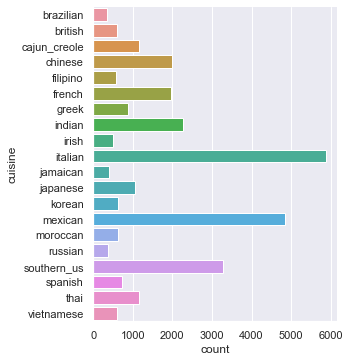

In [9]:
sb.catplot(y = "cuisine", data = trainData, kind = "count")

In [10]:
for i in trainData.index:
    trainData.at[i, "ingredients"] = '#'.join(trainData.at[i, "ingredients"])
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace(' ' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('-' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('(' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace(')' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('.' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace(',' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('%' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('#' , ' ')

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(trainData.ingredients)
trainCounts = pd.DataFrame(matrix.toarray(),
                  index=trainData.index,
                  columns=vectorizer.get_feature_names())

trainCounts

,10ozfrozenchoppedspinach,10ozfrozenchoppedspinachthawedandsqueezeddry,145ozdicedtomatoes,15ozrefriedbeans,1lowfatbuttermilk,1lowfatchocolatemilk,1lowfatcottagecheese,1lowfatmilk,21,25lesssodiumchickenbroth,...,yuzukosho,za,zatarain,zatarainscreoleseasoning,zest,zestyitaliandressing,zinfandel,ziti,zucchini,zucchiniblossoms
7554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
trainCounts['cuisine'] = trainData['cuisine']
trainCounts['id'] = trainData['id']
trainCounts[['id' , 'cuisine']]

,id,cuisine
7554,29204,italian
51,30748,southern_us
33615,4802,southern_us
21408,29037,indian
31301,46049,mexican
...,...,...
4693,22420,southern_us
22637,21735,greek
17646,2277,southern_us
10036,35278,thai


In [12]:
for i in testData.index:
    testData.at[i, "ingredients"] = '#'.join(testData.at[i, "ingredients"])
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace(' ' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('-' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('(' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace(')' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('.' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace(',' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('%' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('#' , ' ')

vectorizer2 = CountVectorizer()
matrix = vectorizer2.fit_transform(testData.ingredients)
testCounts = pd.DataFrame(matrix.toarray(),
                  index=testData.index,
                  columns=vectorizer2.get_feature_names())

testCounts
testCounts['cuisine'] = testData['cuisine']
testCounts['id'] = testData['id']
testCounts[['id' , 'cuisine']]

,id,cuisine
38730,35083,mexican
21851,37179,cajun_creole
13740,1935,thai
390,37109,french
28629,5728,moroccan
...,...,...
32292,35761,thai
26947,9139,italian
2641,37213,japanese
39623,3513,mexican


In [13]:
sum = pd.DataFrame(trainCounts.drop(['cuisine','id'] , axis = 1).T.sum(axis = 1))
sum

,0
10ozfrozenchoppedspinach,2
10ozfrozenchoppedspinachthawedandsqueezeddry,2
145ozdicedtomatoes,3
15ozrefriedbeans,2
1lowfatbuttermilk,2
...,...
zestyitaliandressing,15
zinfandel,6
ziti,25
zucchini,680


In [14]:
top10 = sum.sort_values(by=0 , ascending = False).head(10)
top10 = top10.T
top10

,salt,onions,oliveoil,water,garlic,sugar,garliccloves,butter,groundblackpepper,allpurposeflour
0,13577,6033,6006,5590,5562,4800,4695,3590,3574,3469


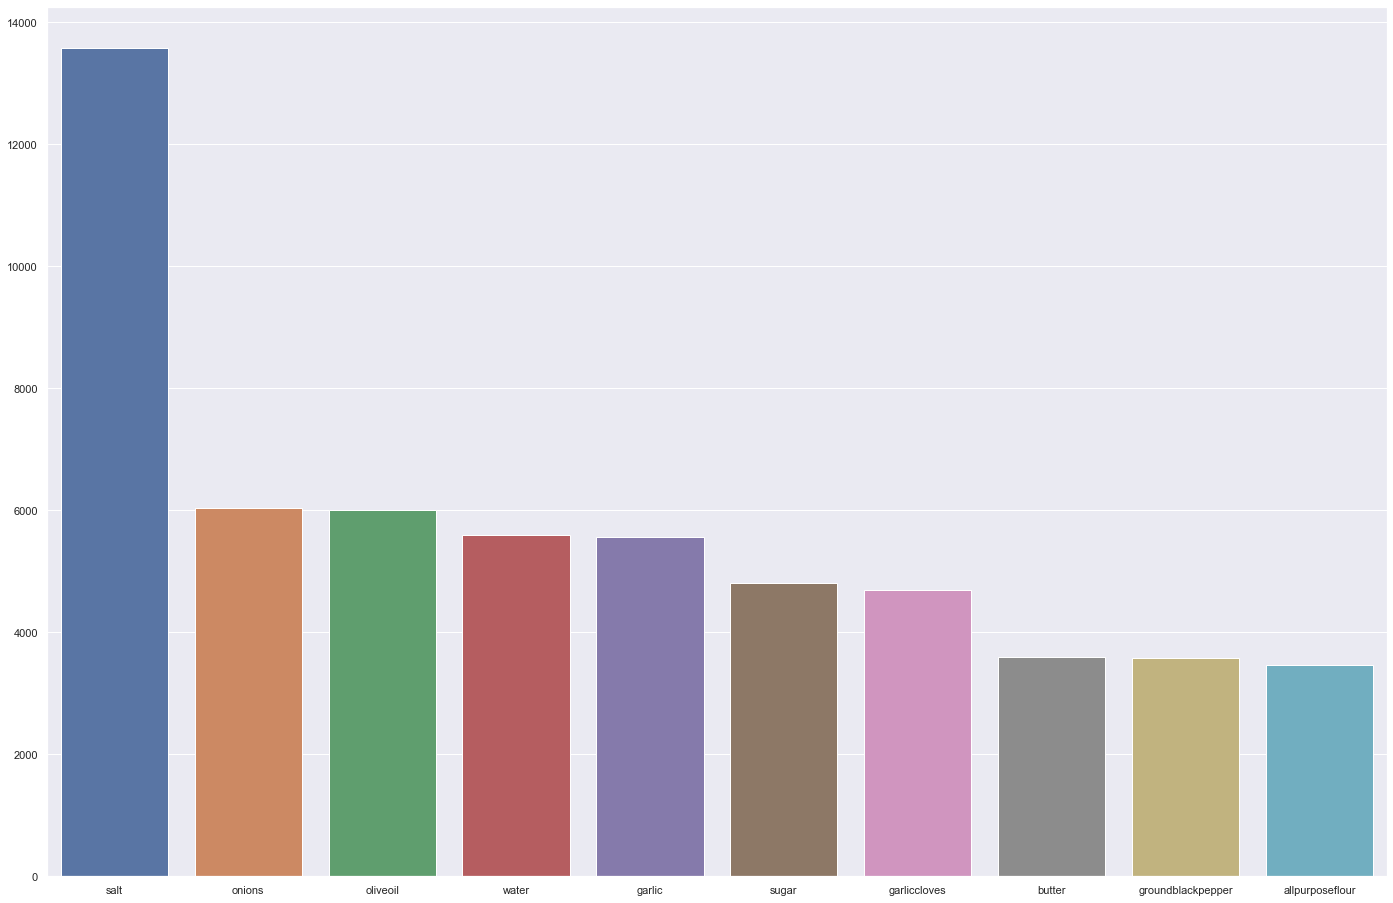

In [15]:
f , axes = plt.subplots(figsize = [24 , 16])
sb.barplot( data = top10 )

In [16]:
trainCounts.drop(['cuisine','id'] , axis = 1).groupby(trainCounts['cuisine']).sum()

,10ozfrozenchoppedspinach,10ozfrozenchoppedspinachthawedandsqueezeddry,145ozdicedtomatoes,15ozrefriedbeans,1lowfatbuttermilk,1lowfatchocolatemilk,1lowfatcottagecheese,1lowfatmilk,21,25lesssodiumchickenbroth,...,yuzukosho,za,zatarain,zatarainscreoleseasoning,zest,zestyitaliandressing,zinfandel,ziti,zucchini,zucchiniblossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,0
british,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
cajun_creole,0,0,0,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,11,0
chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,21,0
filipino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
french,0,0,0,0,0,1,1,32,0,0,...,0,0,0,0,0,0,4,0,65,0
greek,0,1,0,0,0,0,0,5,0,0,...,0,0,0,0,2,1,1,3,32,0
indian,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,33,0
irish,0,0,0,0,1,0,0,9,0,0,...,0,0,0,0,0,0,0,0,3,0


In [17]:
top500 = sum.sort_values(by=0 , ascending = False).head(500)
top500.index

Index(['salt', 'onions', 'oliveoil', 'water', 'garlic', 'sugar',
       'garliccloves', 'butter', 'groundblackpepper', 'allpurposeflour',
       ...
       'quesofresco', 'lightcornsyrup', 'parsleysprigs', 'kale', 'peppercorns',
       'reducedsodiumsoysauce', 'gratedorange', 'crèmefraîche',
       'bonelesschickenbreast', 'pecans'],
      dtype='object', length=500)

In [18]:
trainX = trainCounts[top500.index]
trainY = trainCounts['cuisine']
testX = testCounts[top500.index]
testY = testCounts['cuisine']
trainX

,salt,onions,oliveoil,water,garlic,sugar,garliccloves,butter,groundblackpepper,allpurposeflour,...,quesofresco,lightcornsyrup,parsleysprigs,kale,peppercorns,reducedsodiumsoysauce,gratedorange,crèmefraîche,bonelesschickenbreast,pecans
7554,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33615,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21408,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4693,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22637,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17646,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10036,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(trainX , trainY)

MultinomialNB()

In [20]:
predict = clf.predict(trainX)
predict

array(['italian', 'southern_us', 'southern_us', ..., 'southern_us',
       'japanese', 'italian'], dtype='<U12')

In [21]:
pd.Series(predict , index = trainY.index)

7554         italian
51       southern_us
33615    southern_us
21408    southern_us
31301        mexican
            ...     
4693     southern_us
22637          greek
17646    southern_us
10036       japanese
39470        italian
Length: 29830, dtype: object

In [22]:
trainY

7554         italian
51       southern_us
33615    southern_us
21408         indian
31301        mexican
            ...     
4693     southern_us
22637          greek
17646    southern_us
10036           thai
39470        italian
Name: cuisine, Length: 29830, dtype: category
Categories (20, object): [brazilian, british, cajun_creole, chinese, ..., southern_us, spanish, thai, vietnamese]

In [23]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(trainY, predict))

Accuracy: 0.6987261146496815


In [26]:
predict = clf.predict(testX)
print("Accuracy:",metrics.accuracy_score(testY, predict))

Accuracy: 0.6723652453740949
